# Has the network latency gone up since we switched internet service providers?

$H_0$: The network latency hasn't gone up since we switched internet service providers 

$H_a$: The network latency has gone up since we switched internet service providers

True Negative : Failed to reject $H_0$, 

True Positive
- small p-value -- < alpha (.001)
- reject $H_0$
- avg network latency  before switched internet service providers: 60ms
- avg network latency  after switched internet service providers:  50ms

False Positive
- small p-value -- < alpha (.001)
- reject $H_0$
- The internet speed actually not inproved, but due to lower usage, the test result looks it has improved
True Negative
- higher p-value
- fail to reject $H_0$
- avg network latency  before switched internet service providers: 60ms
- avg network latency  after switched internet service providers: 61ms

False Negative
- higher p-value
- fail to reject $H_0$
- avg network latency  before switched internet service providers: 60ms
- avg survey score after plants: 61ms
- The internet speed indeed inproved, but due to high usage, it didn't show up on the result

# Is the website redesign any good?
$H_0$: The website redesign is same as before.

$H_a$: The website redesign is better than before.

True Positive
- small p-value -- < alpha (.001)
- reject $H_0$
- the click rate before the web redesign is 30%
- the click rate after the web redesign is 40%

False Positive
- small p-value -- < alpha (.001)
- reject $H_0$
- the click rate before the web redesign is 30%
- the click rate after the web redesign is 40%
- Maybe beacuse a special event happened increased the click rate

True Negative
- higher p-value
- fail to reject $H_0$
- the click rate before the web redesign is 30%
- the click rate after the web redesign is 30%

False Negative
- higher p-value
- fail to reject $H_0$
- the click rate before the web redesign is 30%
- the click rate after the web redesign is 31%
- The test results has no significant difference, but the reality is there is a significant difference 

# Is our television ad driving more sales?
$H_0$:  Our sales is same as before since the start of our television ad.

$H_a$:  Our sales is actually increased since the start of our television ad

True Positive
- small p-value -- < alpha (.001)
- reject $H_0$
- Our sales  before the start of television ad is 10000
- Our sales  after  the start of television ad is 15000
- taking into consideration, there's no other factors affect the results

False Positive
- small p-value -- < alpha (.001)
- reject $H_0$
- Our sales  before the start of television ad is 10000
- Our sales  after  the start of television ad is 15000
- Maybe a pandemic happens and our sales increased, no significant evidence to prove it's because of our television ad

True Negative
- higher p-value
- fail to reject $H_0$
- Our sales  before the start of television ad is 10000
- Our sales  after  the start of television ad is 10500
- no significant evidence to show the sale is actually changed a lot

False Negative
- higher p-value
- fail to reject $H_0$
- Our sales  before the start of television ad is 10000
- Our sales  after  the start of television ad is 10000
- The test results has no significant difference, but the reality is there is a significant difference of sales between before the tlevision ad and after the television ad

In [1]:
from math import sqrt
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data
df = pd.read_csv('exam_scores.csv')
df.study_strategy.fillna('None', inplace=True)

 # exercise 1
 Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.
 
 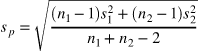

$H_0$: There is no difference in regard to the average time for selling homes for its two offices

$H_a$: There is a difference in regard to the average time for selling homes for its two offices

In [2]:
n1 = 40
s1 = 15
x̄1 = 90
n2 = 50
s2 = 20
x̄2 = 100
degf = (n1 + n2) - 2

In [3]:
Sp = sqrt(((n1-1)*s1**2 +(n2-1)*s2**2)/(n1+n2-2))
Sp

17.956702977389302

In [4]:
t = (x̄1 - x̄2) / (Sp * sqrt(1 / n1 + 1 / n2))
t

-2.6252287036468456

In [5]:
p = stats.t(degf).cdf(t) * 2
p

0.01020985244923939

because p value is less than a value, reject the null hypothesis, which indicates that there is a statistically significant difference in regard to the average time for selling homes for its two offices

In [6]:
mpg = data('mpg')
mpg = mpg.rename(columns = {'class':'class_type'})
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class_type
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


# Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

Are compact cars more fuel-efficient than the average car?

Do manual cars get better gas mileage than automatic cars?

# 1
$H_0$: There is no difference in fuel-efficiency in cars from 2008 vs 1999

$H_a$: There is a difference in fuel-efficiency in cars from 2008 vs 1999

confidence level: 0.05

In [7]:
x1 = mpg[mpg.year == 1999].hwy
x2 = mpg[mpg.year == 2008].hwy

In [8]:
tstat, p = stats.ttest_ind(x1, x2)
tstat, p 
# Since p value 0.97 is much higher than a value 0.05, failed reject the H0,
# which means there is no difference between them.

(-0.03286431672888292, 0.9738110448529322)

# 2

$H_0$: There is no difference in fuel-efficiency between compact cars and the average car

$H_a$: Compact cars are morefuel-efficient than the average car

confidence level: 0.05


In [9]:
x = mpg[mpg.class_type == 'compact'].hwy
mu = mpg.hwy.mean()
p = stats.ttest_1samp(x, mu)
p[1] < 0.05

# Since p value is less than a value, reject the null hypothesis, which means there is a statistically significant
# diffrence between compact cars and the average cars in regard to fuel-efficient

True

# 3

- $H_0$: Manual cars are same as automatic cars in regard to gas mileage 
- $H_a$: manual cars get better gas mileage than automatic cars
- confidence level: 0.05


In [10]:
auto = mpg.trans.str.contains('auto')
manual = mpg.trans.str.contains('manual')
x1 = mpg[auto].hwy
x2 = mpg[manual].hwy

In [11]:
tstat, p = stats.ttest_ind(x1, x2)
tstat, p 
# Since p value is less than a value,  reject the null hypothesis that there
# is no  statistically significant difference between manual cars and automatic cars in regard to gas mileage

(-4.368349972819688, 1.888044765552951e-05)

# Correlation

> Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

- $H_0$: There is no linear relationship between tenure and monthly charges 
- $H_a$: There is linear relationship between tenure and monthly charges 



In [12]:
from env import get_db_url
query = """
    select * from customers
    """
url = get_db_url("telco_churn")
customers = pd.read_sql(query, url)
customers

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


In [13]:
x = customers.tenure
y = customers.monthly_charges

In [14]:
r, p = stats.pearsonr(x, y)
print('r=', r)
print('p=', p)

r= 0.24789985628615002
p= 4.0940449915016345e-99


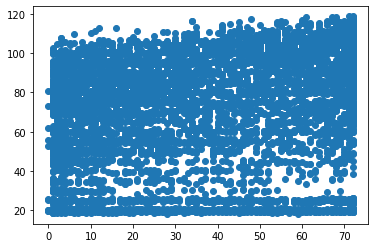

In [15]:
plt.scatter(x, y)

In [16]:
customers.total_charges = customers.total_charges.replace(' ', np.nan).astype(float)
customers = customers.dropna()
customers.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.40,Yes


In [17]:
x = customers.tenure
y = customers.total_charges

In [18]:
r, p = stats.pearsonr(x, y)
print('r=', r)
print('p=', p)

r= 0.825880460933202
p= 0.0


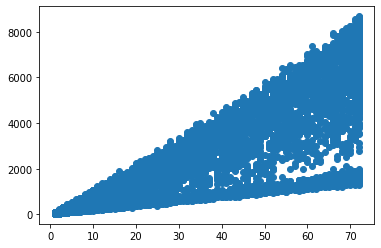

In [19]:
plt.scatter(x, y)

In [132]:
from env import get_db_url
query = """
    SELECT emp_no, salary, dept_emp.from_date, dept_emp.to_date FROM salaries 
    JOIN dept_emp USING(emp_no)
    WHERE dept_emp.to_date > now() AND salaries.to_date > now()
    """
url = get_db_url("employees")
salaries = pd.read_sql(query, url)
salaries

,emp_no,salary,from_date,to_date
0,10001,88958,1986-06-26,9999-01-01
1,10002,72527,1996-08-03,9999-01-01
2,10003,43311,1995-12-03,9999-01-01
3,10004,74057,1986-12-01,9999-01-01
4,10005,94692,1989-09-12,9999-01-01
...,...,...,...,...
240119,499995,52868,1997-06-02,9999-01-01
240120,499996,69501,1996-05-13,9999-01-01
240121,499997,83441,1987-08-30,9999-01-01
240122,499998,55003,1993-12-27,9999-01-01


In [133]:
salaries['from_date']=pd.to_datetime (salaries['from_date'], errors='coerce')
now = datetime.datetime.now()
salaries['tenure']=now.year-salaries.from_date.dt.year
salaries
#salaries.tenure.dt.month

,emp_no,salary,from_date,to_date,tenure
0,10001,88958,1986-06-26,9999-01-01,34
1,10002,72527,1996-08-03,9999-01-01,24
2,10003,43311,1995-12-03,9999-01-01,25
3,10004,74057,1986-12-01,9999-01-01,34
4,10005,94692,1989-09-12,9999-01-01,31
...,...,...,...,...,...
240119,499995,52868,1997-06-02,9999-01-01,23
240120,499996,69501,1996-05-13,9999-01-01,24
240121,499997,83441,1987-08-30,9999-01-01,33
240122,499998,55003,1993-12-27,9999-01-01,27


In [134]:
x = salaries.tenure
y = salaries.salary

In [129]:
stats.pearsonr(x,y)

(0.4516419676218732, 0.0)

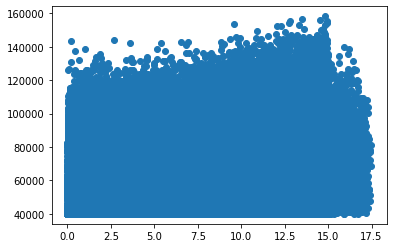

In [130]:
plt.scatter(employees.tenure, employees.salary)

In [46]:
query = '''
SELECT
    DATEDIFF(end_date, start_date) / 365.25 AS tenure,
    salary
FROM (
    SELECT
        e.emp_no,
        e.hire_date AS start_date,
        MAX(s.salary) AS salary,
        IF(
            de.to_date = '9999-01-01',
            (SELECT MAX(hire_date) FROM employees),
            de.to_date
        ) as end_date
    FROM employees e
    JOIN dept_emp de USING (emp_no)
    JOIN salaries s USING (emp_no)
    GROUP BY e.emp_no, start_date, end_date
) a
'''

employees = pd.read_sql(query, get_db_url('employees'))
employees

,tenure,salary
0,13.5907,88958
1,14.1848,72527
2,13.4182,43699
3,13.1581,74057
4,10.3765,94692
...,...,...
331584,7.0418,52868
331585,9.3361,69501
331586,13.7714,83441
331587,6.2916,55003


In [31]:
stats.pearsonr(employees.tenure, employees.salary)

(0.30984532042633584, 0.0)

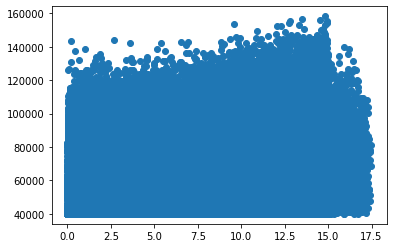

In [32]:
plt.scatter(employees.tenure, employees.salary)